# Author : Voona Sanjana

# Data Science & Business Analytics Internship


# GRIP - The Spark Foundation

# TASK 3 - Perform ‘Exploratory Data Analysis’ on dataset 

# Objective :

# 1. As a business manager, try to find out the weak areas where you can    work to make more profit.

# 2.What all business problems you can derive by exploring the data?

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

C:\Users\ASUS\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df=pd.read_csv(r"C:\Users\ASUS\Desktop\thesparkfoundation\Task -3\SampleSuperstore.csv")
df

Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Code Region         Category Sub-Category     Sales  Quantity  \
0           42420  South        Furniture    Bookcases  261.9600         2   
1           42420  South        Furniture       Chairs  731.9400         3   
2           90036   West  Office Supplies       Labels   14.6200         2   
3           33311  South        Furniture       Tables  957.5775         5   
4           33311  South  Office Supplies      Storage   22.3680         2   
...           ...    ...              ...          ...       ...       ...   
9989        33180  South        Furniture  Furnishings   25.2480         3   
9990        92627   West        Furniture  Furnishings   91.9600         2   
9991        92627   West       Technology       Phones  258.5760         2   
9992        92627   West  Office Supplies        Paper   29.6000         4   
9993        92683   West  Office Supplies   Appliances  243.1600         2   

      Discount    Profit  
0         0.00   41.9136  
1         0.00  219.5820  
2         0.00    6.8714  
3         0.45 -383.0310  
4         0.20    2.5164  
...        ...       ...  
9989      0.20    4.1028  
9990      0.00   15.6332  
9991      0.20   19.3932  
9992      0.00   13.3200  
9993      0.00   72.9480  

[9994 rows x 13 columns]

# EDA

In [4]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.shape

(9994, 13)

* <b>What are total Sales and Profits of the company?</b>

In [90]:
s = df['Sales'].sum()
p = df['Profit'].sum()
print("Total sales in US is",s)
print("Total profit in US is",p)

Total sales in US is 2296195.5903
Total profit in US is 286241.4226


<b>Top 10 States by Sales and Profits</b>

In [91]:
Top_10_Sales = df.groupby("State").Sales.sum().nlargest(n =10)
Top_10_Profits = df.groupby("State").Profit.sum().nlargest(n =10)

In [92]:
Top_10_Sales.index

Index(['California', 'New York', 'Texas', 'Washington', 'Pennsylvania',
       'Florida', 'Illinois', 'Ohio', 'Michigan', 'Virginia'],
      dtype='object', name='State')

In [93]:
Top_10_Profits.index

Index(['California', 'New York', 'Washington', 'Michigan', 'Virginia',
       'Indiana', 'Georgia', 'Kentucky', 'Minnesota', 'Delaware'],
      dtype='object', name='State')

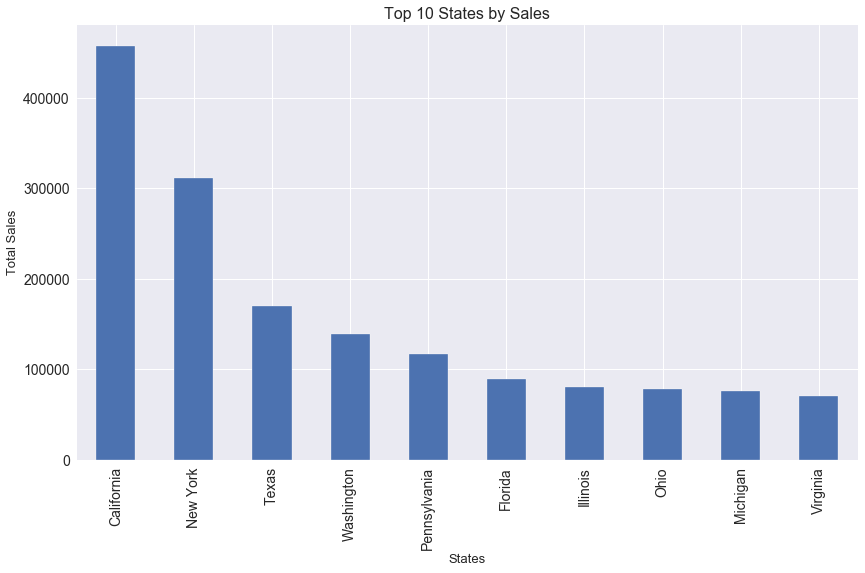

In [94]:
plt.style.use('seaborn')
Top_10_Sales.plot(kind ='bar', figsize =(14,8), fontsize =14)
plt.xlabel("States", fontsize =13)
plt.ylabel("Total Sales",fontsize =13)
plt.title("Top 10 States by Sales",fontsize =16)
plt.show()

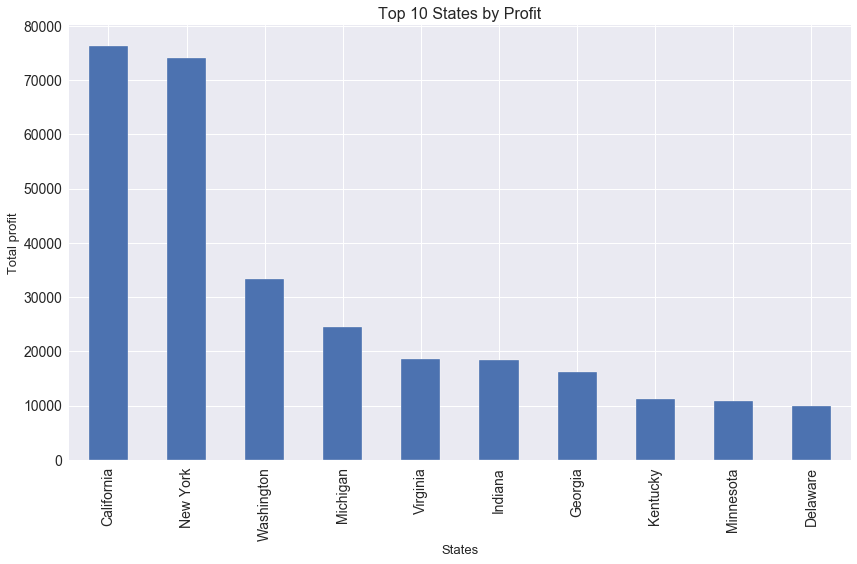

In [97]:
plt.style.use('seaborn')
Top_10_Profits.plot(kind ='bar', figsize =(14,8), fontsize =14)
plt.xlabel("States", fontsize =13)
plt.ylabel("Total profit",fontsize =13)
plt.title("Top 10 States by Profit",fontsize =16)
plt.show()

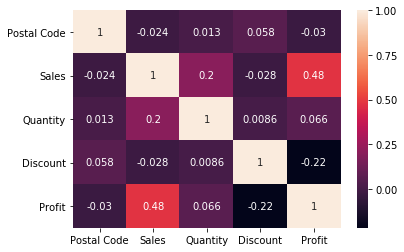

In [6]:
sns.heatmap(df.corr(), annot = True)

 <b>From Above map we infer that -:</b>
 * <b> sales and profits are positively correlated</b>
 * <b> Discount and Profits are Negatively correlated</b>

In [7]:
data_con = df.select_dtypes(include=[np.number])
data_con

Postal Code     Sales  Quantity  Discount    Profit
0           42420  261.9600         2      0.00   41.9136
1           42420  731.9400         3      0.00  219.5820
2           90036   14.6200         2      0.00    6.8714
3           33311  957.5775         5      0.45 -383.0310
4           33311   22.3680         2      0.20    2.5164
...           ...       ...       ...       ...       ...
9989        33180   25.2480         3      0.20    4.1028
9990        92627   91.9600         2      0.00   15.6332
9991        92627  258.5760         2      0.20   19.3932
9992        92627   29.6000         4      0.00   13.3200
9993        92683  243.1600         2      0.00   72.9480

[9994 rows x 5 columns]

# Importing more

In [10]:
from plotly import __version__
import cufflinks as cf

In [11]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot

init_notebook_mode(connected=True)

cf.go_offline()

In [18]:
df.describe()

Postal Code         Sales     Quantity     Discount      Profit
count   9977.000000   9977.000000  9977.000000  9977.000000  9977.00000
mean   55154.964117    230.148902     3.790719     0.156278    28.69013
std    32058.266816    623.721409     2.226657     0.206455   234.45784
min     1040.000000      0.444000     1.000000     0.000000 -6599.97800
25%    23223.000000     17.300000     2.000000     0.000000     1.72620
50%    55901.000000     54.816000     3.000000     0.200000     8.67100
75%    90008.000000    209.970000     5.000000     0.200000    29.37200
max    99301.000000  22638.480000    14.000000     0.800000  8399.97600

In [25]:
for col in df.columns:
    if df[col].dtype=='object':
        print("Number of unique entries in",col + " are",df[col].nunique())
        print("-----------------------------------------------------------")

Number of unique entries in Ship Mode are 4
-----------------------------------------------------------
Number of unique entries in Segment are 3
-----------------------------------------------------------
Number of unique entries in Country are 1
-----------------------------------------------------------
Number of unique entries in City are 531
-----------------------------------------------------------
Number of unique entries in State are 49
-----------------------------------------------------------
Number of unique entries in Region are 4
-----------------------------------------------------------
Number of unique entries in Category are 3
-----------------------------------------------------------
Number of unique entries in Sub-Category are 17
-----------------------------------------------------------


In [29]:
df.iplot(x="Region", y="Sales",kind='bar',title='Region VS Sales',xTitle='Region',yTitle='Sales') #visualisation

# There are more sales in West Region and least at south region

In [55]:
df.iplot(x="Region", y="Profit",kind='bar',title='Region VS Profit',xTitle='Region',yTitle='Profit',color='green') #visualisation

In [139]:
df.iplot(x="Region", y="Discount",kind='bar',title='Region VS Discount',xTitle='Region',yTitle='Discount',color='green')

* <B>  More Profit in WEST  and loss in CENTRAL </B>
* <B>  Both profit and loss is more in EAST </B>
* <b>  More discount in Central Region </b>

In [100]:
df.iplot(x="Discount", y="Sales",kind='bar',title='Discount VS Sales',xTitle='Discount',yTitle='Sales') #visualisation

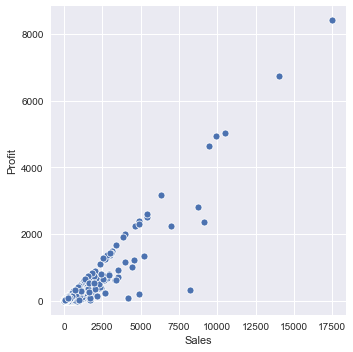

In [105]:
data=df[df['Discount']==0]
sns.relplot(x='Sales',y='Profit',data=data)

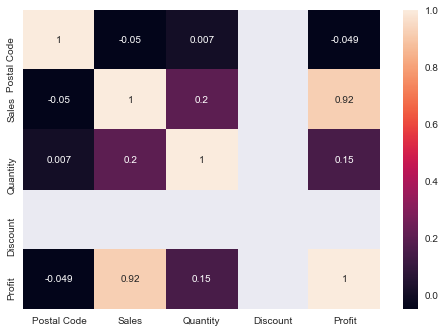

In [107]:
correlation=data.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

<B> There is more discount at 0 </B>

<b>Hence we say that in above 2 graphs having 0 discount there positive relation between Profit and sales. Now we plot heat_map to get correlaton</b>

<b>Hence, we see that There is strong correlation between sales and Profit i.e 0.92</b>



In [99]:
pd.crosstab(index=df['Category'],columns='count')       

col_0            count
Category              
Furniture         2118
Office Supplies   6012
Technology        1847

In [34]:
pd.crosstab(index=df['Segment'],columns='count')   

col_0        count
Segment           
Consumer      5183
Corporate     3015
Home Office   1779

In [36]:
pd.crosstab(index=df['Sub-Category'],columns='count') 

col_0         count
Sub-Category       
Accessories     775
Appliances      466
Art             795
Binders        1522
Bookcases       228
Chairs          615
Copiers          68
Envelopes       254
Fasteners       217
Furnishings     956
Labels          363
Machines        115
Paper          1359
Phones          889
Storage         846
Supplies        190
Tables          319

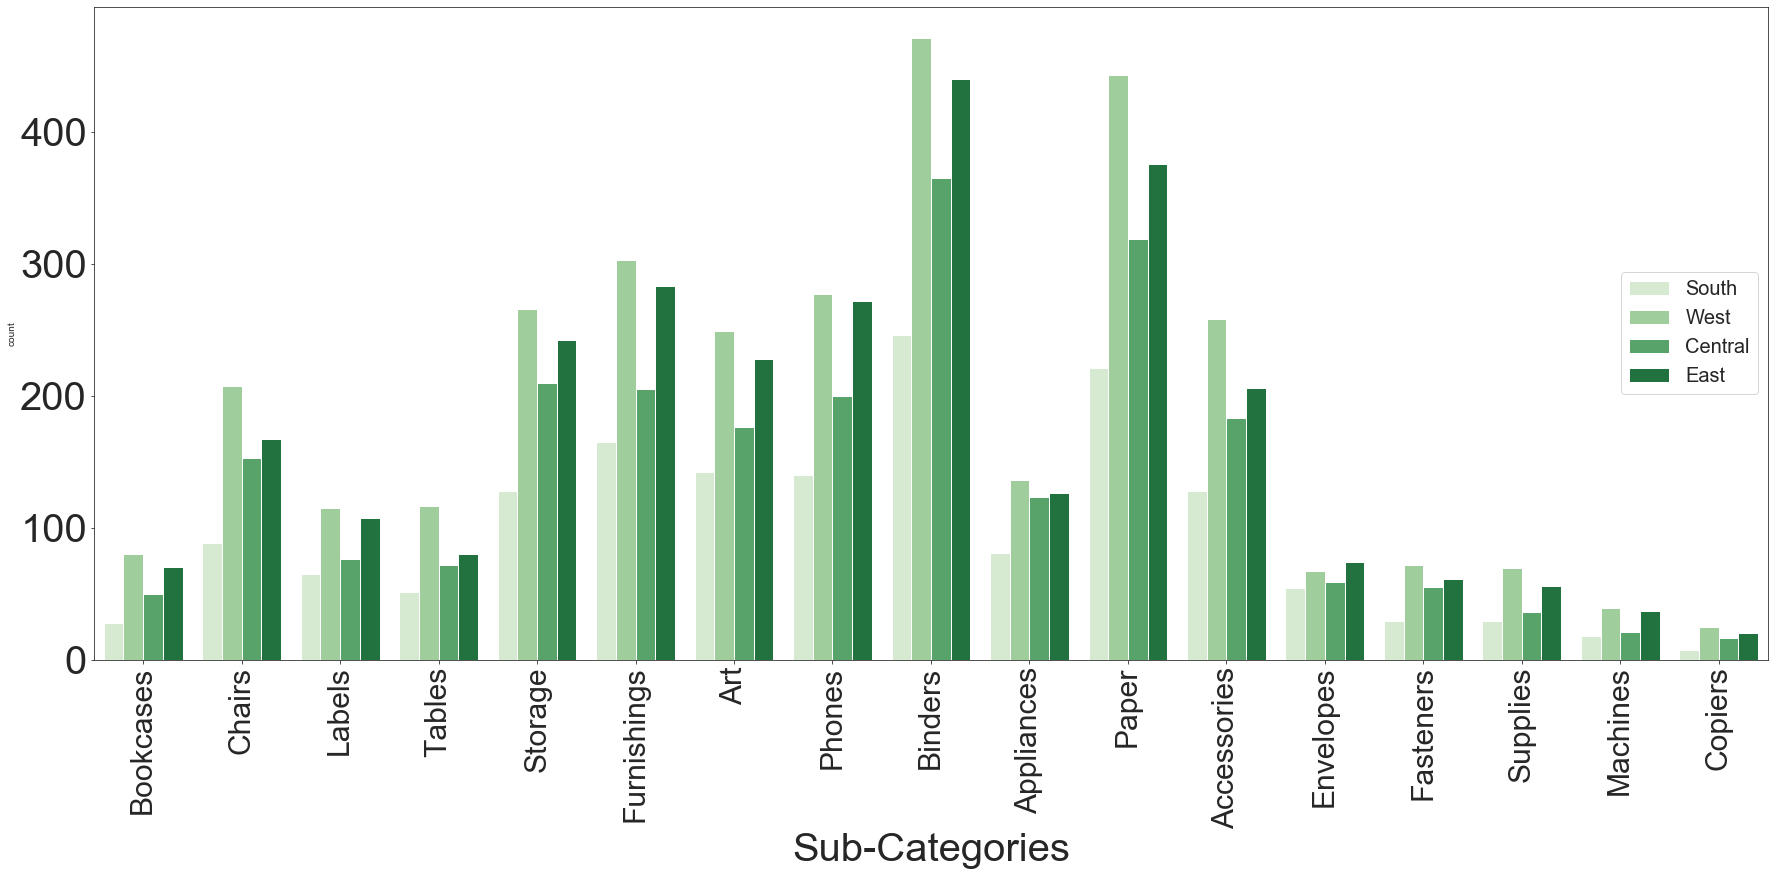

In [47]:
plt.figure(figsize = (30, 12))
sns.countplot(x = 'Sub-Category', hue = 'Region', data = df, palette = 'Greens')
plt.xticks(rotation = 90, fontsize = 30)
plt.yticks(fontsize = 40)
plt.xlabel('Sub-Categories',fontsize = 40)
plt.legend(loc = 5, fontsize = 20)

<b> Here west and east have high no of sub category </b>

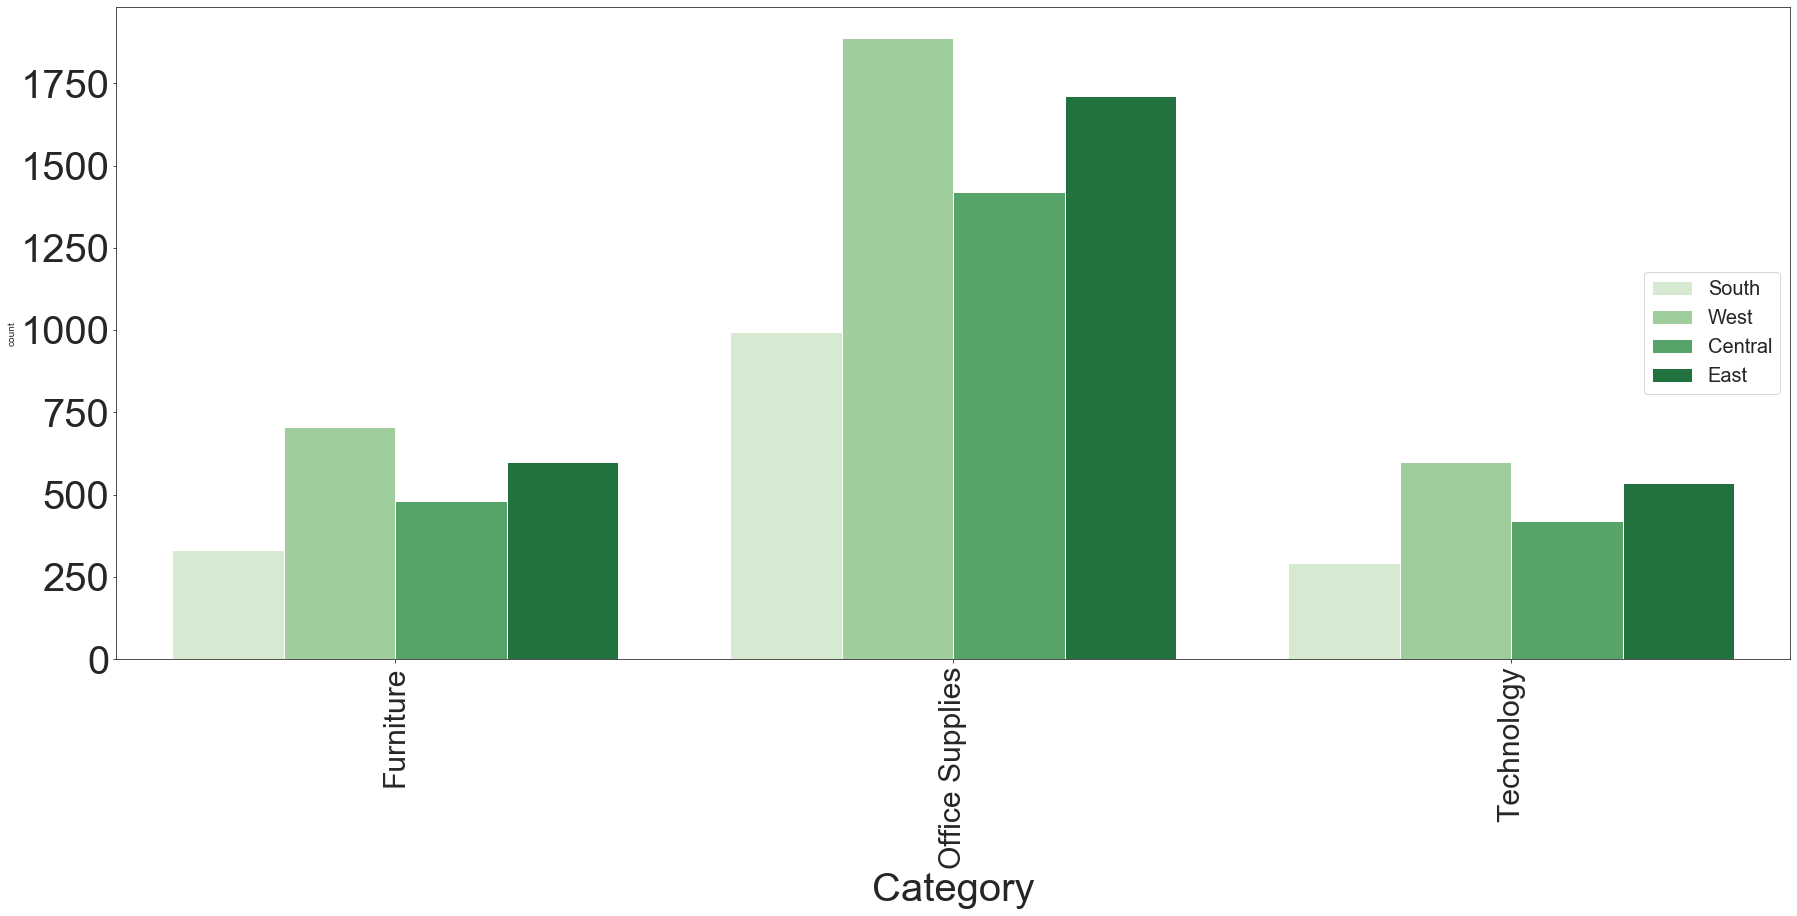

In [56]:
plt.figure(figsize = (30, 12))
sns.countplot(x = 'Category', hue = 'Region', data = df, palette = 'Greens')
plt.xticks(rotation = 90, fontsize = 30)
plt.yticks(fontsize = 40)
plt.xlabel('Category',fontsize = 40)
plt.legend(loc = 5, fontsize = 20)

<b>From the above count plot, we can conclude that people residing in the west region order more as compared to other regions</b>

# Data count by category

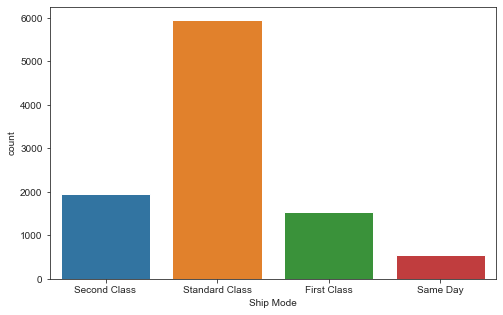

In [57]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Ship Mode'])

<b> * Standard class is more in all Ship mode </b>

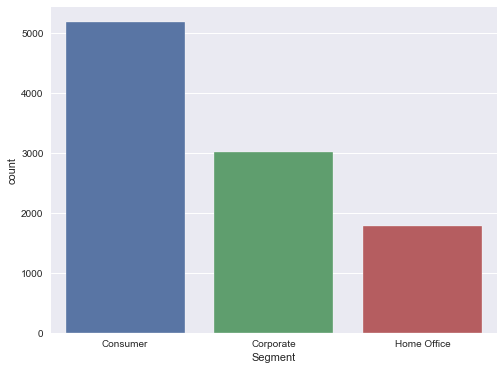

In [108]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['Segment'])
plt.show()

<b> * Consumer is more in all Segments and Home office is less in all Segment </b>

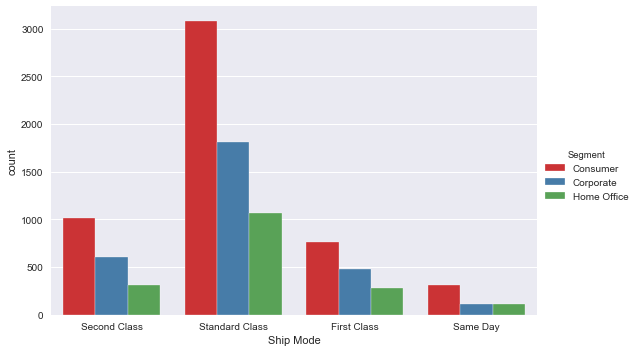

In [109]:
sns.catplot("Ship Mode", hue="Segment", data=df, kind="count", aspect=1.5, palette="Set1")

<b> * Standard class is more in all classes as compare to others and consumer is more in all other modes </b>

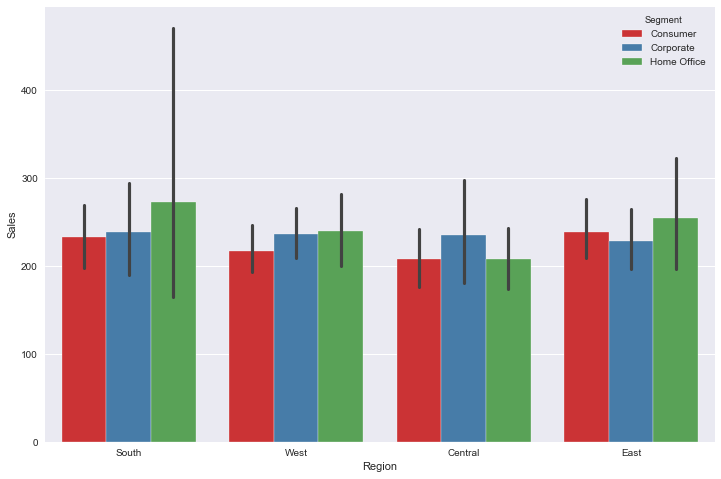

In [121]:

plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Segment", data=df, palette="Set1")

<B> This Graph shows tells that all are equal atmost but Home Office is greater in all except central Region </B>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

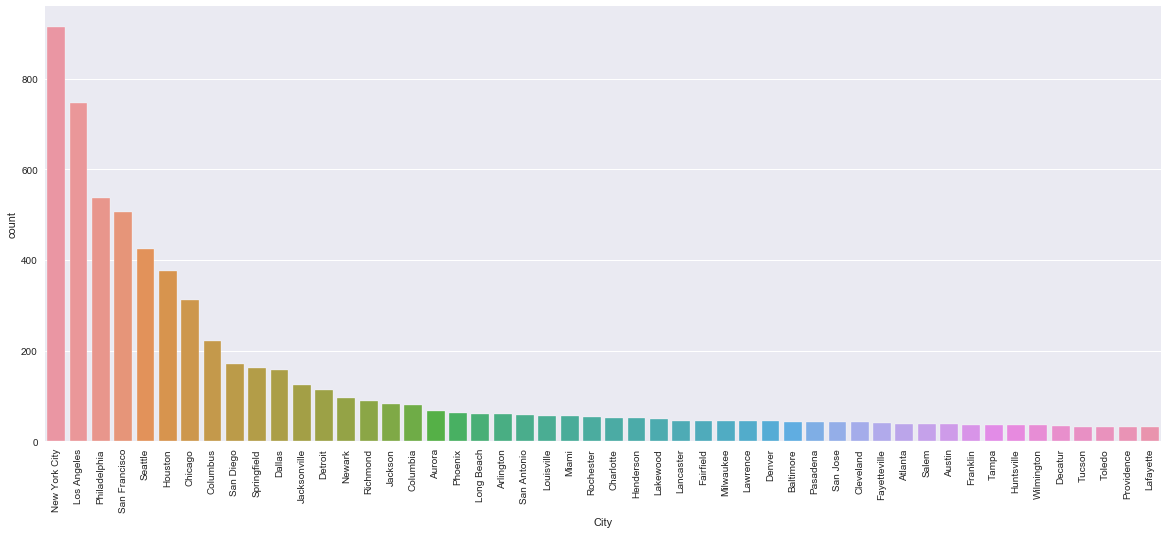

In [111]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['City'], order=(df['City'].value_counts().head(50)).index)
plt.xticks(rotation=90)

# Sales by category and Sub - category

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

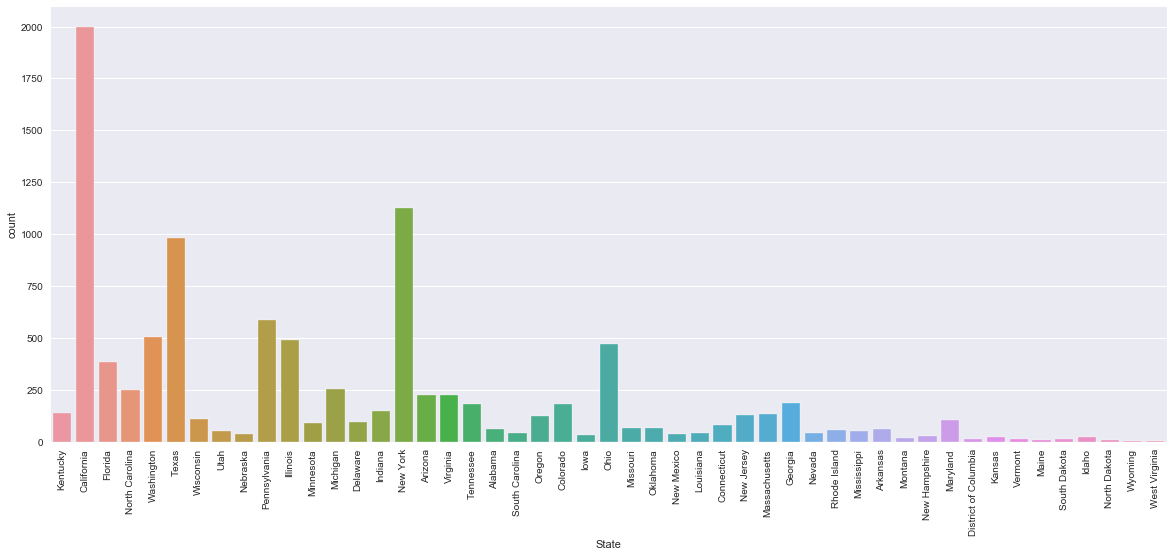

In [112]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['State'])
plt.xticks(rotation=90)

In [113]:
df.iplot(x="Sub-Category", y="Sales",kind='bar',colors='violet',
         title='Sub_Category VS Sales',xTitle='Sub_Category',yTitle='Sales')

<b> Sub catergory with more sales </b>
* phones
* chairs
* storage
* Tables
* Binders
* Machines

Text(0, 0.5, 'Sales')

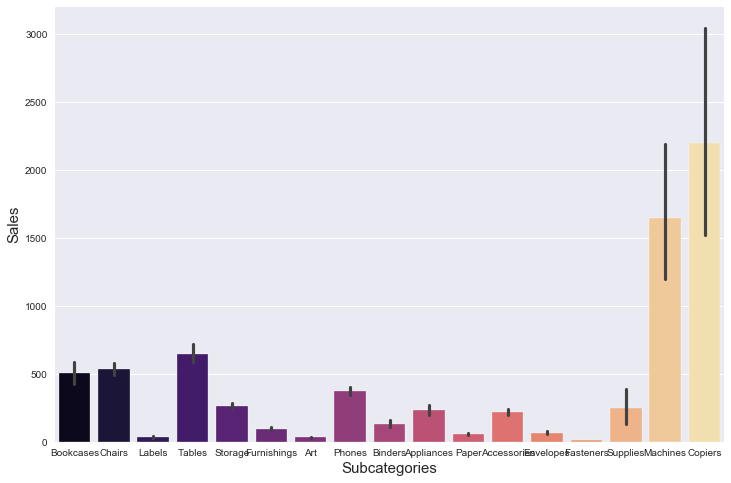

In [131]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Sub-Category", y="Sales", data=df, palette="magma")
plt.xlabel("Subcategories",fontsize=15)
plt.ylabel("Sales",fontsize=15)

<B> More in Copiers and Machines as compared to others </B>

In [114]:
df.iplot(x="Category", y="Sales",kind='bar',colors='yellow',
         title='Category VS Sales',xTitle='Category',yTitle='Sales',)

Text(0, 0.5, 'Sales')

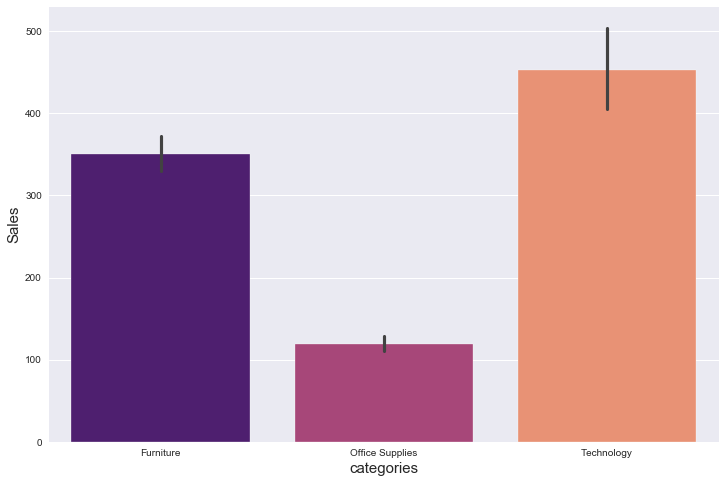

In [132]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Category", y="Sales", data=df, palette="magma")
plt.xlabel("categories",fontsize=15)
plt.ylabel("Sales",fontsize=15)

<B> Technology is more and less in Office </B>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

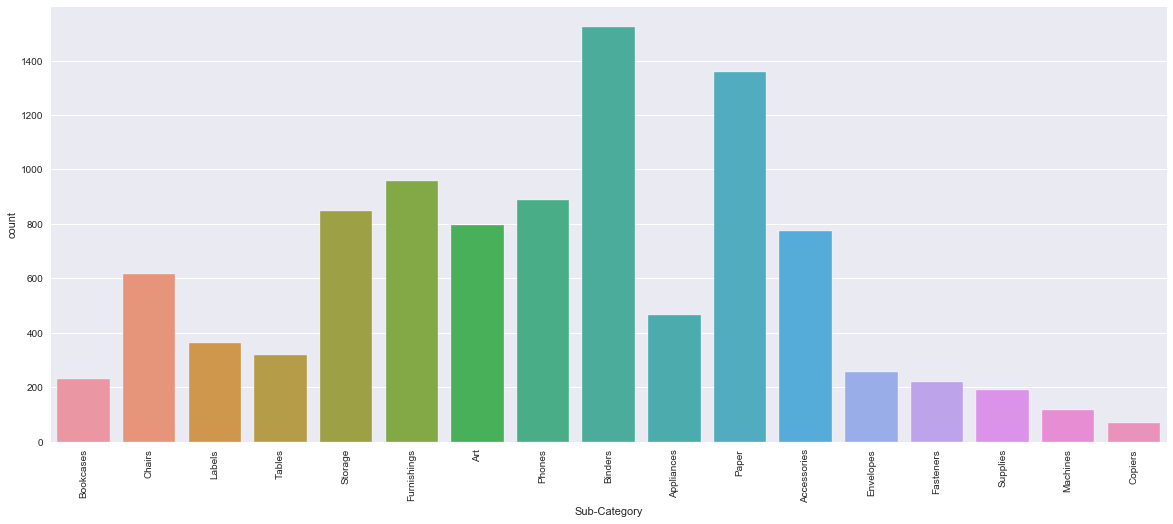

In [115]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['Sub-Category'])
plt.xticks(rotation=90)

<B> Highest - Binders , Paper , Furnishing , Storage , Accessories , Chair </B>

# Profit by sub-category and Category

In [116]:
df.iplot(x="Sub-Category", y="Profit",kind='bar',title='Sub-Category VS Profit',xTitle='Sub-Category',yTitle='Profit',color='red') #visualisation

* <b> More loss is in Binder , Tables , Machines , Chair ,BookCases </b>


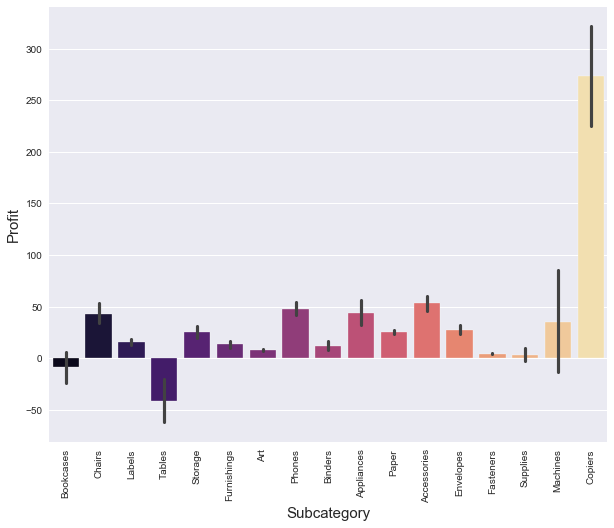

In [126]:
plt.figure(figsize=[10,8])
ax = sns.barplot(x="Sub-Category", y="Profit", data=ds, palette="magma")
plt.xlabel("Subcategory", fontsize=15)
plt.ylabel("Profit",fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [117]:
df.iplot(x="Category", y="Profit",kind='bar',title='Category VS Profit',xTitle='Category',yTitle='Profit',color='red') #visualisation

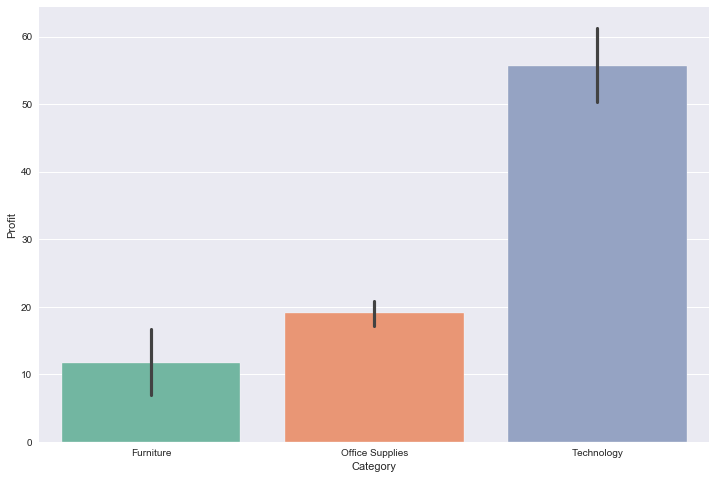

In [125]:
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Category", y="Profit", data=ds, palette="Set2")

<b> Technology gives you more profit and Furniture gives you more loss </b>

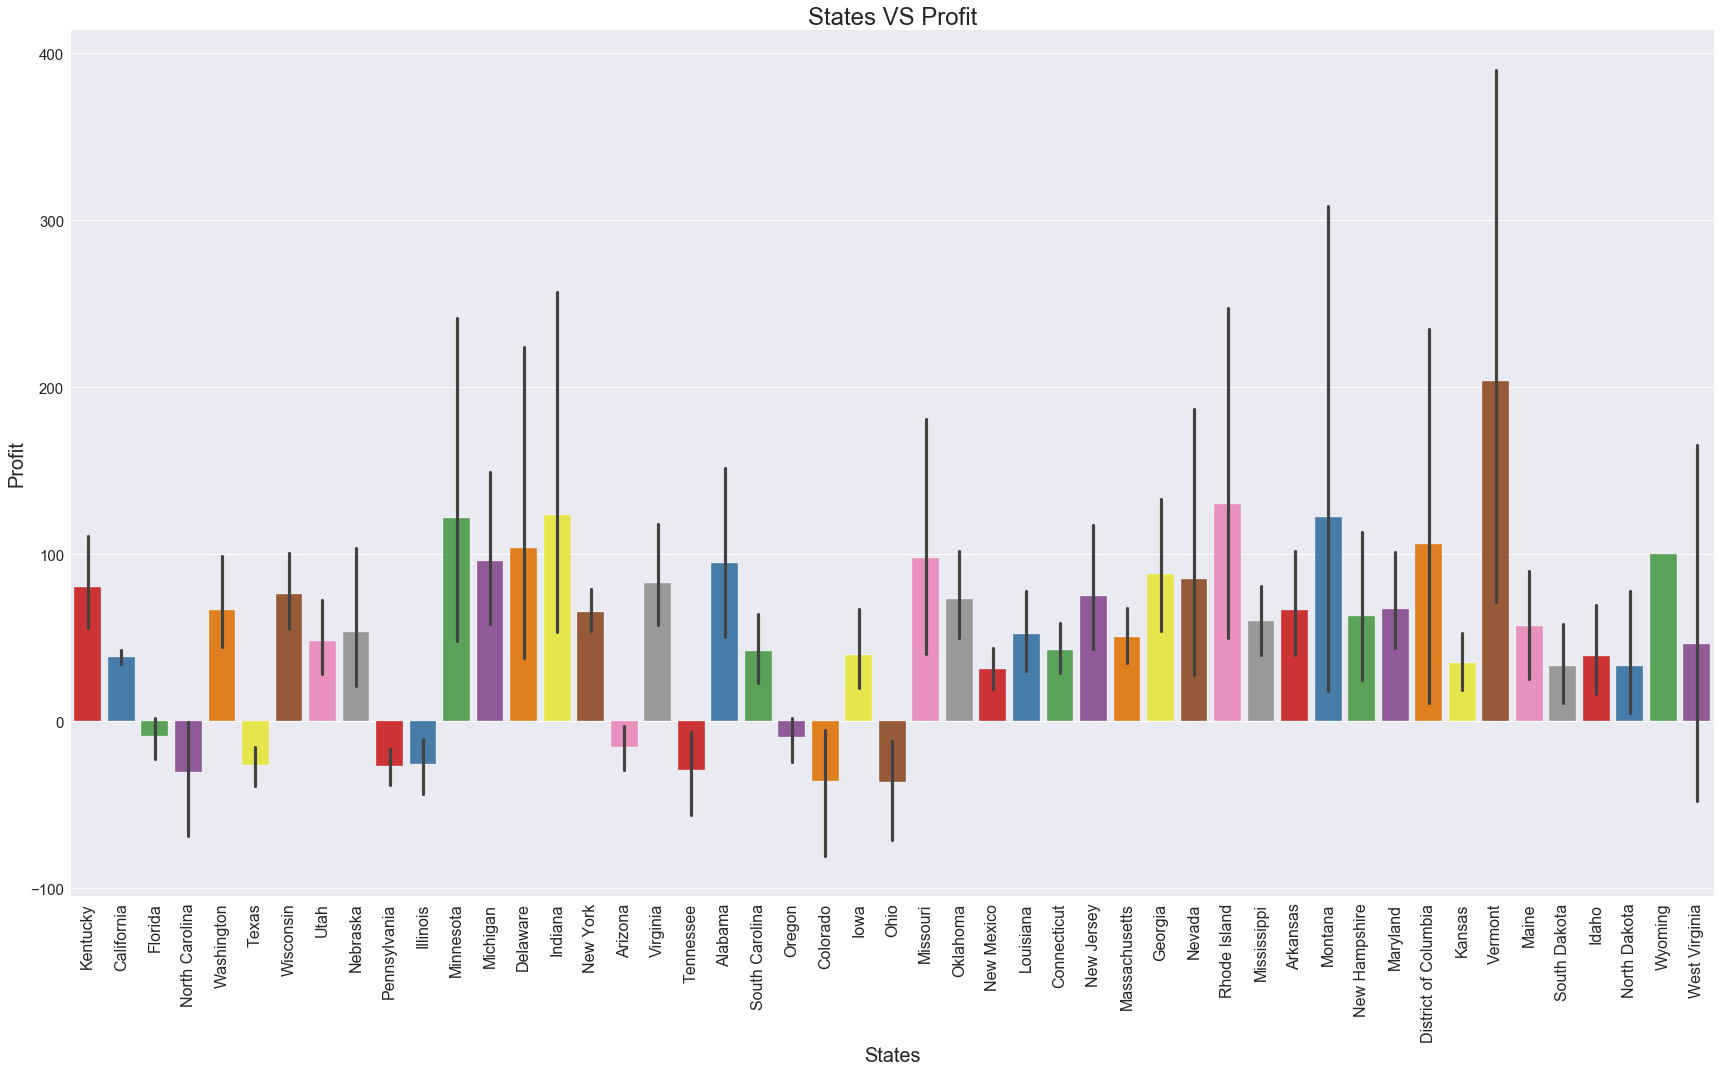

In [118]:
plt.figure(figsize=[24,15])
ax = sns.barplot(x="State", y="Profit", data=df, palette="Set1",)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=15)
plt.title("States VS Profit",fontsize=24)
plt.xlabel("States",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.tight_layout()

In [119]:
df.iplot(x="State", y="Profit",kind='bar',title='State VS Profit',xTitle='State',yTitle='Profit',color='red') #visualisation

<b> States with more loss are  Ohio , Texas , Illinos , Minnesota , Tennessee , Arizona , Pennsylvania </b>

In [137]:
pivot1=pd.pivot_table(df,index='Sub-Category',values='Discount')
#pivot.plot(kind='bar')
pivot1

Discount
Sub-Category          
Accessories   0.078452
Appliances    0.166524
Art           0.074969
Binders       0.372011
Bookcases     0.211140
Chairs        0.170244
Copiers       0.161765
Envelopes     0.080315
Fasteners     0.082028
Furnishings   0.138494
Labels        0.068871
Machines      0.306087
Paper         0.074908
Phones        0.154556
Storage       0.074704
Supplies      0.076842
Tables        0.261285

<b> There is more discount in Binders , Bookcases , Machines , Tables </b> 

In [136]:
pivot=pd.pivot_table(df,index='Category',values='Discount')
#pivot.plot(kind='bar')
pivot

Discount
Category                 
Furniture        0.174027
Office Supplies  0.157385
Technology       0.132323

<b> There is more discount in Furnitures </b>

# SUMMARY POINTS TO CONCLUDE 

 * <b>Total sales in US is 2296195.5903</b>
 * <b> Total profit in US is 286241.4226</b>

* <b>Top 10 States by Sales: 'California', 'New York', 'Texas', 'Washington', 'Pennsylvania','Florida', 'Illinois', 'Ohio', 'Michigan', 'Virginia'</b>
* <b>.Top 10 States by Profit: 'California', 'New York', 'Washington', 'Michigan', 'Virginia','Indiana', 'Georgia',       'Kentucky', 'Minnesota', 'Delaware'</b>
* <b>California and New York are far ahead of their competitor states in terms of Profits.</b>

   <b>Factors which are co-related</b>
 * <b>sales and profits are positively correlated</b>
 * <b>Discount and Profits are Negatively correlated</b>
 * <b>There is more discount at  value 0 </b>
 * <b>Hence we say that in above 2 graphs having 0 discount there positive relation between Profit and sales.</b> 
 * <b>Hence, we see that There is strong correlation between sales and Profit i.e 0.92 . </b>
    
    
* <b>Regions with Sub-Category-Here West and east have high no of sub category .</b>
* <b> we can conclude that people residing in the west region order more as compared to other regions.</b>
* <b>Standard class is more in all Ship mode.</b>
* <b>Consumer is more in all Segments and Home office is less in all Segment.</b>
* <b>Standard class is more in all classes as compare to others and consumer is more in all other modes.</b>
* <b>In Segment section It tells that all are equal atmost but Home Office is greater in all except in central Region.</b>


<b>Sub catergory with more sales</b>
   * <b> phones </b>
   * <b>chairs</b>
   * <b>storage</b>
   * <b>Tables</b>
   * <b>Binders</b>
   * <b>Machines</b>

* <b>Sales are more in Copiers and Machines as compared to others in Sub-Catergory .</b>
* <b>Sales are more in Technology and less in Office under  Category.</b>
* <b>Highest count in sub-category - Binders , Paper , Furnishing , Storage , Accessories .</b>
* <b>There is More loss  in Binder , Tables , Machines , Chair ,BookCases as compared to profits in Sub-Caterogry.</b>
* <b>products like phones and copiers give more profit in Catergory.</b>
* <b>Technology gives you more profit in Catergory.</b>
* <b>Furniture gives you more loss in Catergory .</b>
* <b>States with more loss are Ohio , Texas , Illinos , Minnesota , Tennessee , Arizona , Pennsylvania .</b>
* <b>States with more profit are California and New York .</b>
* <b>Sub-Catergory with more discount are Binders , Bookcases , Machines , Tables .</b>
* <b>Catergory with more discount in Furnitures .</b>

# From All these analysis we can finally conclude that :-

<b>1) If we give more Discount on products , our sales goes increses but Profit get down.</b>

<b>2) In Technology category business we get more Profit as compared to other two business Catergory.These is because of we given less Discount of 0.13.</b>

<b>3) Here we also focus on our Office under category because sales of these category is less as compared to other two.</b>

<b>4) we should also focus on Furniture because there is more loss and more discount given to this Catergory.</b>

<b>5) we should focus on 'Fasteners','labels', 'Supplies'and 'Art' sub-category businesses .</b>

<b>6) For more  profits , we  need to sell consumer segment products more .</b>

<b>7) For increasing  the profits , we need to sell more to the states which are liking our products like NEWYORK and CALIFORNIA .</b>

<b>Hence To get good profit in any business you have to focus on increasing sales but not giving more discount</b>

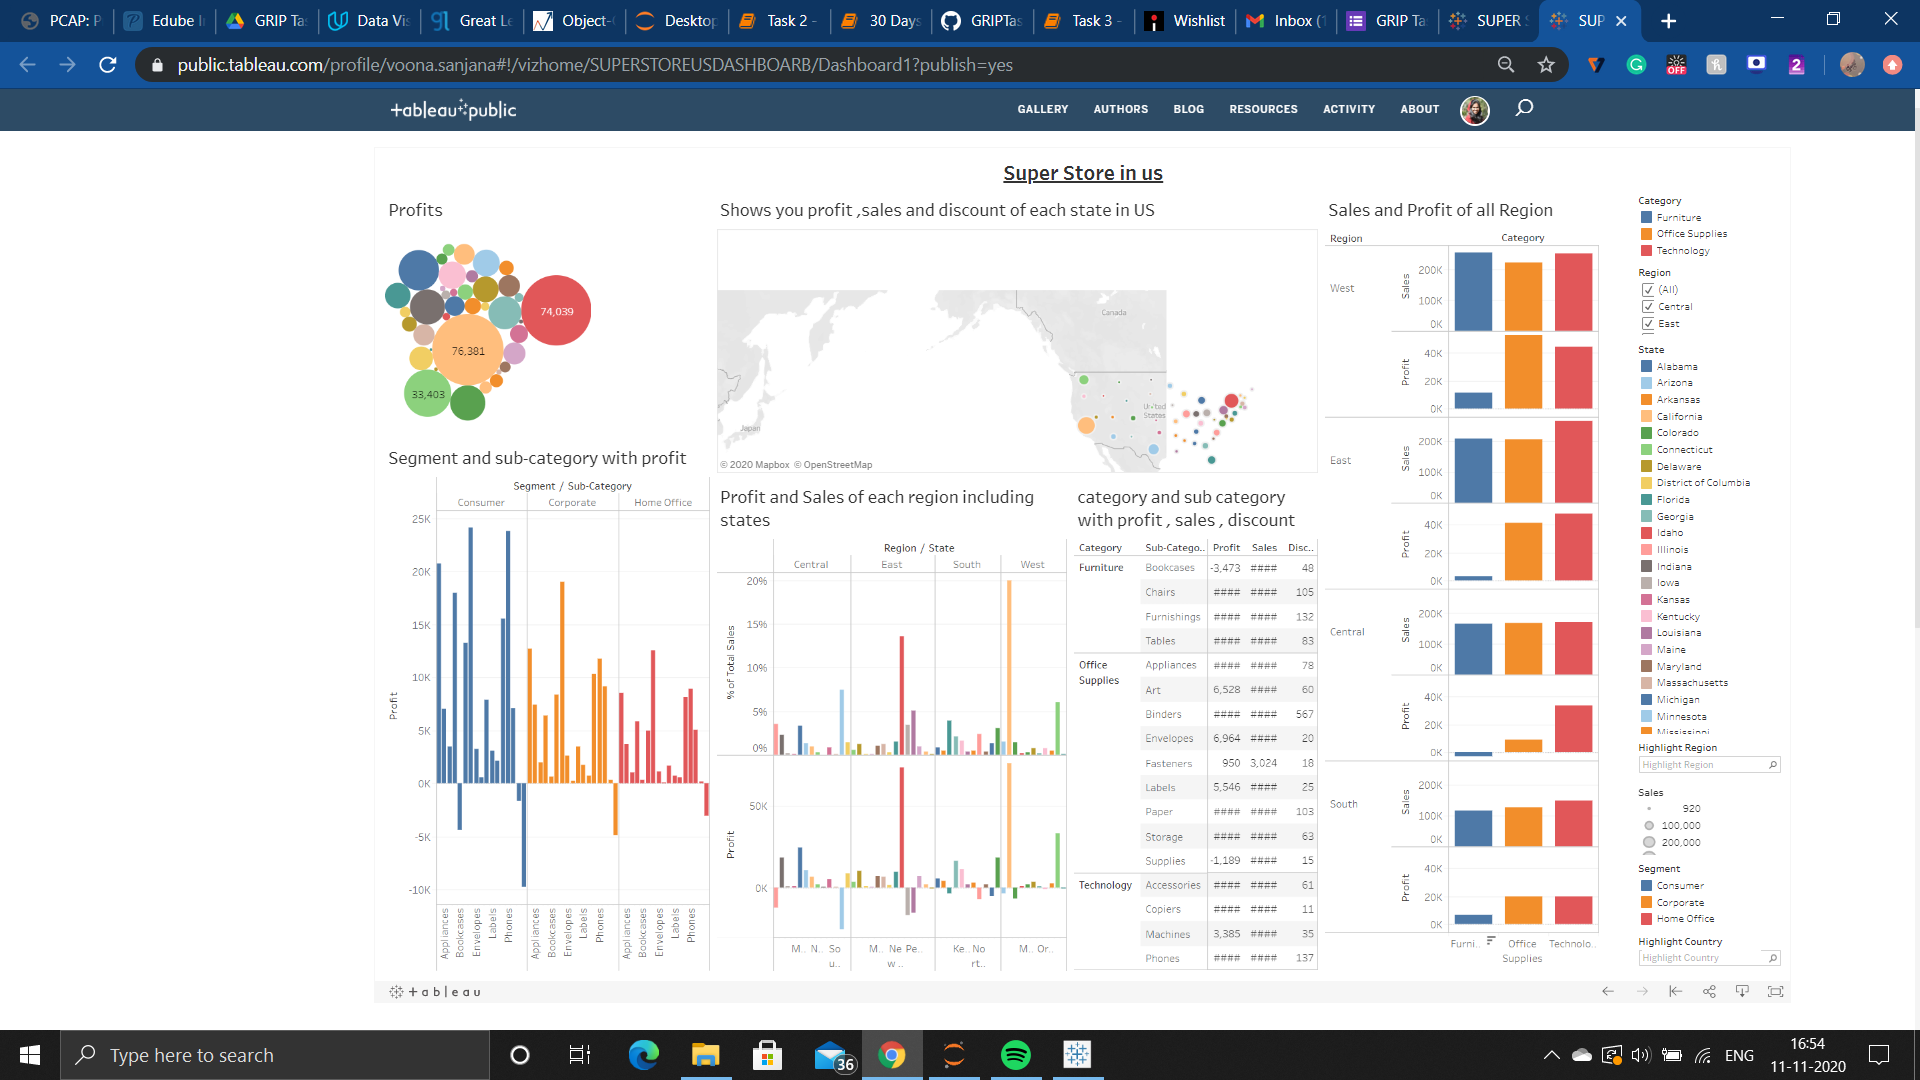

In [145]:
from IPython.display import Image
Image(filename='test.png') 


[CLICK ME IF YOU WANT TO SEE MY DASHBOARB](https://public.tableau.com/profile/voona.sanjana#!/vizhome/SUPERSTOREUSDASHBOARB/Dashboard1?publish=yes)

# Thank you !